<a href="https://colab.research.google.com/github/2303a510c3/AIML--2303a510c3/blob/main/2303a510c3_B06_ipyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction of real estate valuation based on geo-referencing.

1.Identify the top 5 house age values with most estate value.

2. Does MRT station, Stores contribute to real estate value

3. Identify the max and min house price of unit area.

14.

4. Predict the date when most transactions happed in real estate.

5. Identify the closest distance perimeter for MRT Stations, stores for high real estate value.

Bussbess Intentions

Real esta valuation

In [2]:
import pandas as pd

# Sample DataFrame (replace this with your actual data)
# Ensure your data includes 'house_age' and 'estate_value' columns
data = {
    'house_age': [10, 20, 30, 20, 10, 15, 10, 30, 20, 25],
    'estate_value': [500, 450, 700, 650, 550, 600, 520, 680, 620, 580]
}
df = pd.DataFrame(data)

# Group by 'house_age' and calculate the total estate value for each age
grouped = df.groupby('house_age')['estate_value'].sum()

# Sort by estate value in descending order
sorted_group = grouped.sort_values(ascending=False)

# Get the top 5 house ages with the most estate value
top_5_house_ages = sorted_group.head(5)

print("Top 5 house ages with the most estate value:")
print(top_5_house_ages)


Top 5 house ages with the most estate value:
house_age
20    1720
10    1570
30    1380
15     600
25     580
Name: estate_value, dtype: int64


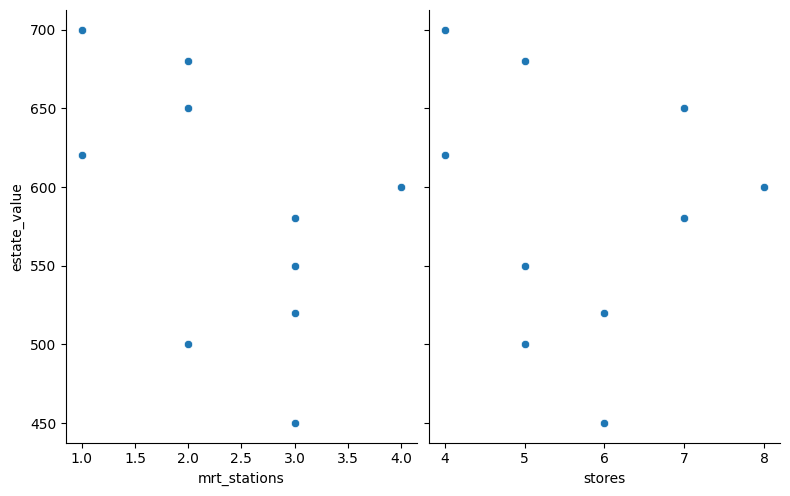

R-squared value: -0.0006660899653978536
Coefficients for MRT stations and stores: [-69.25  27.  ]
Intercept: 612.0


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Sample DataFrame (replace this with your actual data)
# Ensure your data includes 'estate_value', 'mrt_stations', and 'stores' columns
data = {
    'estate_value': [500, 450, 700, 650, 550, 600, 520, 680, 620, 580],
    'mrt_stations': [2, 3, 1, 2, 3, 4, 3, 2, 1, 3],
    'stores': [5, 6, 4, 7, 5, 8, 6, 5, 4, 7]
}
df = pd.DataFrame(data)

# Visualize the relationships using scatter plots
sns.pairplot(df, x_vars=['mrt_stations', 'stores'], y_vars='estate_value', height=5, aspect=0.8)
plt.show()

# Prepare data for regression
X = df[['mrt_stations', 'stores']]  # Features
y = df['estate_value']              # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)

# Display coefficients
print("Coefficients for MRT stations and stores:", model.coef_)
print("Intercept:", model.intercept_)


In [4]:
import pandas as pd

# Sample DataFrame (replace with your actual data)
# Ensure your data includes a 'unit_price' column representing house price per unit area
data = {
    'house_id': [1, 2, 3, 4, 5],
    'unit_price': [5000, 7000, 4500, 8000, 6000]  # Prices per unit area
}
df = pd.DataFrame(data)

# Find the maximum and minimum unit price
max_price = df['unit_price'].max()
min_price = df['unit_price'].min()

# Identify the corresponding house records
max_price_record = df[df['unit_price'] == max_price]
min_price_record = df[df['unit_price'] == min_price]

print("Maximum unit price:")
print(max_price_record)
print("\nMinimum unit price:")
print(min_price_record)


Maximum unit price:
   house_id  unit_price
3         4        8000

Minimum unit price:
   house_id  unit_price
2         3        4500


In [5]:
import pandas as pd

# Sample DataFrame (replace with your actual data)
# Ensure your data includes a 'transaction_date' column
data = {
    'transaction_date': ['2023-01-01', '2023-01-01', '2023-02-15', '2023-01-01', '2023-02-15', '2023-03-10'],
    'transaction_id': [1, 2, 3, 4, 5, 6]
}
df = pd.DataFrame(data)

# Convert 'transaction_date' to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Count transactions for each date
transaction_counts = df['transaction_date'].value_counts()

# Find the date with the most transactions
most_transactions_date = transaction_counts.idxmax()
most_transactions_count = transaction_counts.max()

print("Date with the most transactions:", most_transactions_date)
print("Number of transactions on that date:", most_transactions_count)


Date with the most transactions: 2023-01-01 00:00:00
Number of transactions on that date: 3


In [6]:
import pandas as pd

# Sample DataFrame (replace with your actual data)
# Ensure your data includes 'estate_value', 'distance_to_mrt', and 'distance_to_stores'
data = {
    'estate_value': [500, 450, 700, 650, 550, 600, 520, 680, 620, 580],
    'distance_to_mrt': [0.5, 1.0, 0.3, 0.4, 0.6, 1.2, 0.8, 0.2, 0.7, 0.5],  # distances in km
    'distance_to_stores': [0.2, 0.3, 0.1, 0.4, 0.3, 0.5, 0.2, 0.1, 0.3, 0.4]  # distances in km
}
df = pd.DataFrame(data)

# Define a high-value threshold (e.g., top 20% of estate values)
high_value_threshold = df['estate_value'].quantile(0.8)

# Filter properties with high estate values
high_value_properties = df[df['estate_value'] >= high_value_threshold]

# Identify the closest distances for MRT and stores among high-value properties
min_distance_to_mrt = high_value_properties['distance_to_mrt'].min()
min_distance_to_stores = high_value_properties['distance_to_stores'].min()

print("Closest distance to MRT for high estate value:", min_distance_to_mrt, "km")
print("Closest distance to Stores for high estate value:", min_distance_to_stores, "km")


Closest distance to MRT for high estate value: 0.2 km
Closest distance to Stores for high estate value: 0.1 km
